In [1]:
import rasterio
import pathlib
import passion
import matplotlib.pyplot as plt
import rasterio.merge
import rasterio.plot

In [2]:
segmentation_path = pathlib.Path('../../workflow/output/skopje-z19/segmentation')

rooftops_path = segmentation_path / 'rooftops'
sections_path = segmentation_path / 'sections'
superstructures_path = segmentation_path / 'superstructures'

Opening images 0:
../../workflow/output/skopje-z19/segmentation/rooftops/42D00M09142SNORTH_21D22M59609SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/sections/42D00M09142SNORTH_21D22M59609SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/superstructures/42D00M09142SNORTH_21D22M59609SEAST_19L_MASK.tif
Boundaries: ((75080108.0, 49823370.0), (75082108.0, 49821896.0))
Zoom level: 19


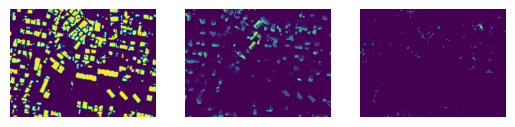

Opening images 1:
../../workflow/output/skopje-z19/segmentation/rooftops/42D00M19726SNORTH_21D22M40297SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/sections/42D00M19726SNORTH_21D22M40297SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/superstructures/42D00M19726SNORTH_21D22M40297SEAST_19L_MASK.tif
Boundaries: ((75078108.0, 49821895.0), (75080108.0, 49820421.0))
Zoom level: 19


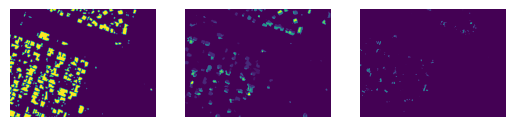

Opening images 2:
../../workflow/output/skopje-z19/segmentation/rooftops/42D00M19726SNORTH_21D22M59609SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/sections/42D00M19726SNORTH_21D22M59609SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/superstructures/42D00M19726SNORTH_21D22M59609SEAST_19L_MASK.tif
Boundaries: ((75080108.0, 49821895.0), (75082108.0, 49820421.0))
Zoom level: 19


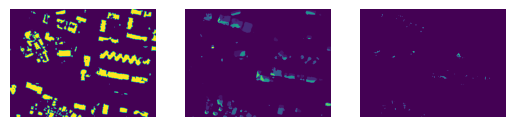

Opening images 3:
../../workflow/output/skopje-z19/segmentation/rooftops/42D00M09142SNORTH_21D22M40297SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/sections/42D00M09142SNORTH_21D22M40297SEAST_19L_MASK.tif
../../workflow/output/skopje-z19/segmentation/superstructures/42D00M09142SNORTH_21D22M40297SEAST_19L_MASK.tif
Boundaries: ((75078108.0, 49823370.0), (75080108.0, 49821896.0))
Zoom level: 19


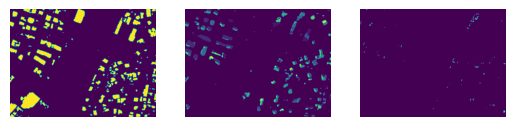

In [5]:
rooftops = []
sections = []
superstructures = []

r_glob, s_glob, su_glob = rooftops_path.glob('*.tif'), sections_path.glob('*.tif'), superstructures_path.glob('*.tif')
for i, (r_path, s_path, su_path) in enumerate(zip(r_glob, s_glob, su_glob)):
    print(f'Opening images {i}:')
    print(r_path)
    print(s_path)
    print(su_path)
    
    r_src = rasterio.open(r_path)
    s_src = rasterio.open(s_path)
    su_src = rasterio.open(su_path)
    bounds = r_src.bounds
    bbox = (bounds.left, bounds.top), (bounds.right, bounds.bottom)
    zoom = r_src.tags().get('zoom_level')
    
    print(f'Boundaries: {bbox}')
    print(f'Zoom level: {zoom}')
    
    fig, ax = plt.subplots(1,3)

    r_c = r_src.read(1)
    s_c = s_src.read(1)
    su_c = su_src.read(1)
    ax[0].imshow(r_c)
    ax[1].imshow(s_c)
    ax[2].imshow(su_c)
    for a in ax:
        a.axis('off')
    plt.show()
    
    rooftops.append(r_src)
    sections.append(s_src)
    superstructures.append(su_src)

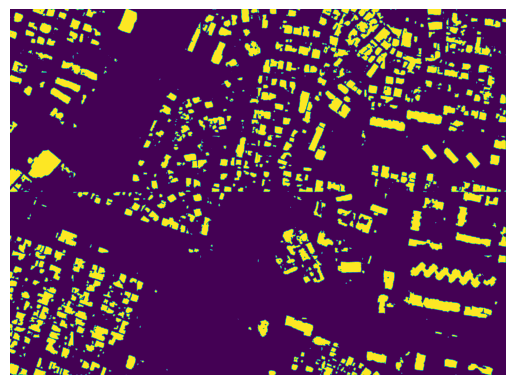

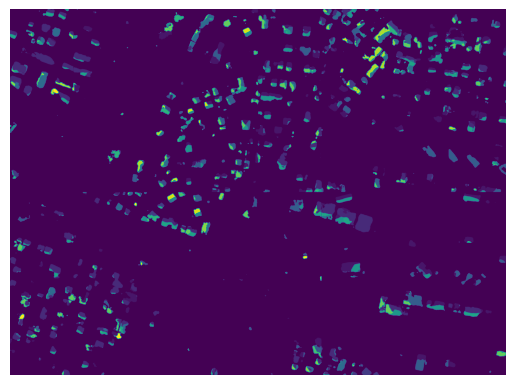

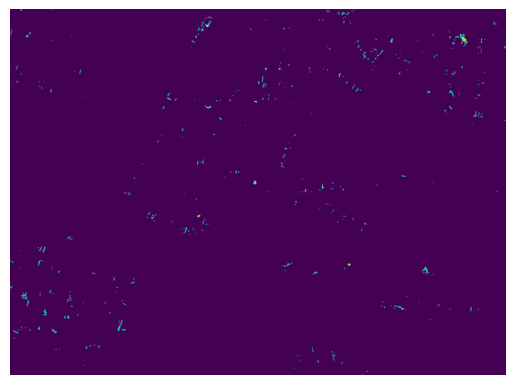

<AxesSubplot:>

In [6]:
r_merged = rasterio.merge.merge(rooftops)
s_merged = rasterio.merge.merge(sections)
su_merged = rasterio.merge.merge(superstructures)

plt.axis('off')
rasterio.plot.show(r_merged[0])
plt.axis('off')
rasterio.plot.show(s_merged[0])
plt.axis('off')
rasterio.plot.show(su_merged[0])

In [8]:
satellite_path = pathlib.Path('../../workflow/output/skopje-z19/satellite')

satellites = []

for i, path in enumerate(satellite_path.glob('*.tif')):
    src = rasterio.open(path)
    satellites.append(src)

merged = rasterio.merge.merge(satellites)

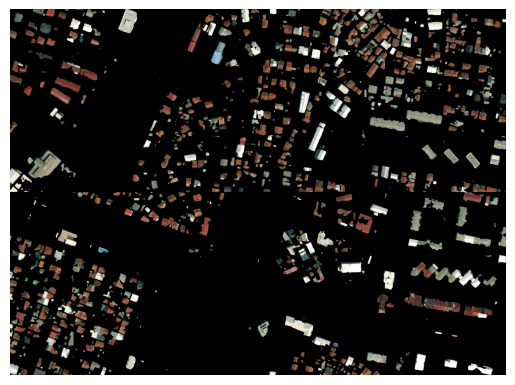

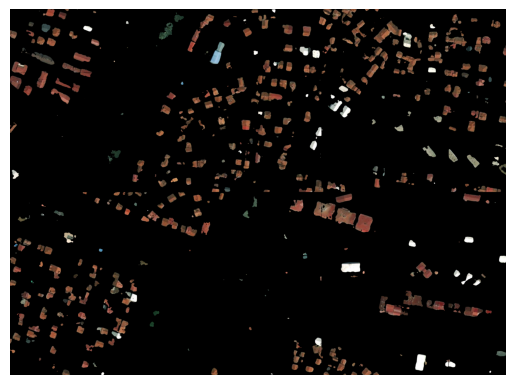

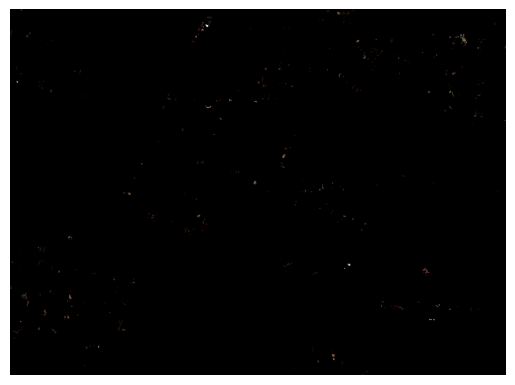

<AxesSubplot:>

In [19]:
plt.axis('off')
rasterio.plot.show(merged[0] * r_merged[0])
plt.axis('off')
rasterio.plot.show(merged[0] * (s_merged[0] != 0).astype('uint8'))
plt.axis('off')
rasterio.plot.show(merged[0] * (su_merged[0] != 0).astype('uint8'))